# Applied Statistics and Inference Assignment

1.  What are Type I and Type II errors in hypothesis testing, and how do they
impact decision-making?
- Type-I error: It is the rejection of null hypothesis when it is actually true, example when innocent person is convicted.Type I error risk matters more when false positives are costly.
- Type-II error:  It is the failure to reject the null hypothesis when it is actually false, example a guilty person may not be. Type II error risk matters more when missing true effects is costly

2. What is the P-value in hypothesis testing, and how should it be interpreted
in the context of the null hypothesis?
- The p-value is the probability value, calculated from a statistical test(Corresponding to Z score of a sample). P-value in hypothesis testing is used to decide whether to reject a null hypothesis or not.
- Small P-value :The observed data would be very unlikely if the null hypothesis were true → evidence supports the alternative hypothesis (H₁)
- Large P-value : The observed data are quite likely under the null hypothesis → no reason to reject H₀                                                      

3. Explain the difference between a Z-test and a T-test, including when to use each.
- Z-test: Used to test hypotheses when the population variance is known and the sample size is large (n > 30). It follows the standard normal distribution (Z-distribution). Population variance is known.
- T-test: Used when the population variance is unknown and the sample size is small (n ≤ 30). The t-distribution is depends on degree of freedom. Population variance is unknown.

4.  What is a confidence interval, and how does the margin of error influence
its width and interpretation?
- A confidence interval is a range of values that estimates a population parameter (like a mean or proportion) based on sample data. It gives us an interval estimate rather than a single number, showing both the estimate’s precision and uncertainty.
- confidence interval is equals to interval(range of values) point estimates +- margin of error.
- Margin of Error determines how wide or narrow the interval is, Larger margin of error Wider confidence interval less precise estimate, Smaller margin of error  Narrower confidence interval more precise estimate

5.  Describe the purpose and assumptions of an ANOVA test. How does it
extend hypothesis testing to more than two groups?
- ANOVA test purpose: It is a statistical method used to compare the means of 2 or more groups. Generally it  is used for more than two groups. Using variance you want to determine, if the mean value of three or more than three group are same or different.
- ANOVA test assumption:
1. The population from which samples are drawn should be normally distributed.
2. The samples should be independent of each other.
3. Absence of outliers.
4. Homogenity of variance.
- ANOVA Extends Hypothesis Testing
1. A t-test compares the means of two groups only.
2. ANOVA extends this to three or more groups using the F-statistic, which is the ratio of F is equlas to:  Between-group variance / Within-group variance.
3. If the between-group variance is much larger than the within-group variance, it suggests significant differences among means.

6.  Write a Python program to perform a one-sample Z-test and interpret the
result for a given dataset

In [7]:
import numpy as np
from scipy import stats

#  data
population_mean = 50
sample = np.array([51.2, 49.8, 50.5, 52.0, 50.9, 51.5, 49.7, 50.8, 51.6, 52.1,
                   50.3, 50.9, 51.7, 51.0, 50.2, 52.4, 51.3, 50.6, 51.8, 52.0,
                   50.7, 50.4, 51.5, 50.9, 51.2, 51.9, 50.8, 51.4, 50.6, 52.2])

# Calculate sample statistics
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

# Perform one-sample Z-test
z_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Z-statistic: {z_statistic:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(" Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print(" Fail to reject the null hypothesis: No significant difference found.")


Sample Mean: 51.13
Z-statistic: 8.716
P-value: 0.0000
 Reject the null hypothesis: The sample mean is significantly different from the population mean.


7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using
NumPy and plot the histogram.


First 10 simulated values: [2 6 6 2 5 6 5 3 6 3]


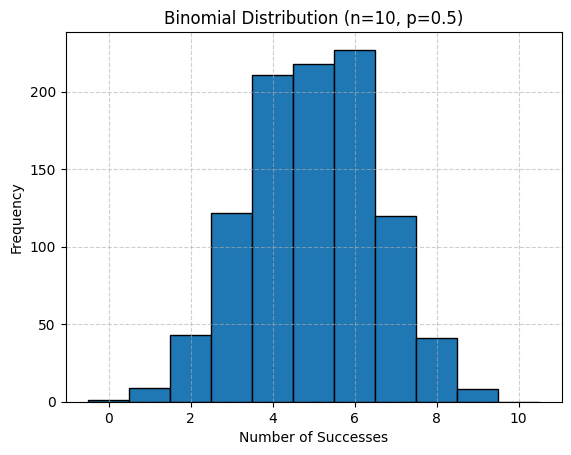

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10       # number of trials
p = 0.5      # probability of success
size = 1000  # number of observations

#  dataset
data = np.random.binomial(n, p, size)

# Display first few values
print("First 10 simulated values:", data[:10])

# Plot histogram
plt.hist(data, bins=np.arange(0, n+2) - 0.5, edgecolor='black')
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


8.  Generate multiple samples from a non-normal distribution and implement
the Central Limit Theorem using Python

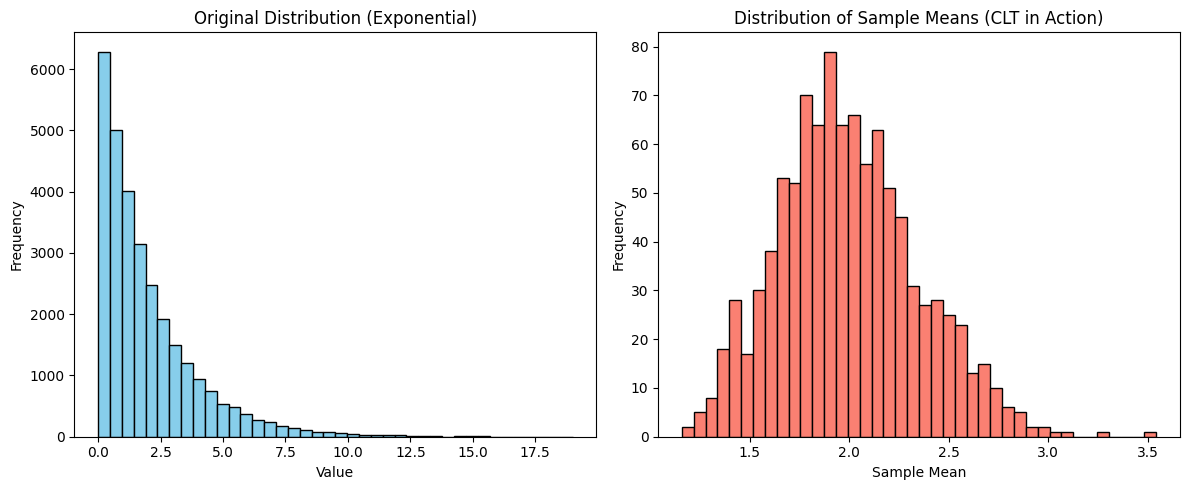

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
sample_size = 30     # number of values in each sample
num_samples = 1000   # how many samples to take

# Generate samples from a non-normal (Exponential) distribution
data = np.random.exponential(scale=2, size=(num_samples, sample_size))

# Calculate the mean of each sample
sample_means = np.mean(data, axis=1)

# Plot the original distribution
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(data.flatten(), bins=40, color='skyblue', edgecolor='black')
plt.title("Original Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Plot the distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=40, color='salmon', edgecolor='black')
plt.title("Distribution of Sample Means (CLT in Action)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


9.  Write a Python function to calculate and visualize the confidence interval
for a sample mean.


Sample Mean = 51.376
95% Confidence Interval = (48.312, 54.440)


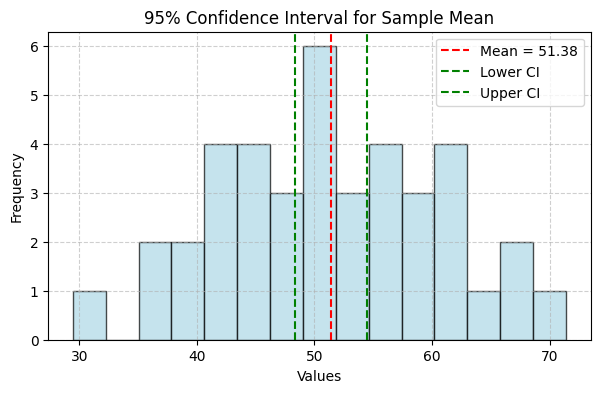

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def confidence_interval(data, confidence=0.95):
    # Convert to numpy array
    data = np.array(data)

    # Calculate statistics
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)  # standard error of the mean

    # Calculate confidence interval
    margin = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    lower_bound = mean - margin
    upper_bound = mean + margin

    print(f"Sample Mean = {mean:.3f}")
    print(f"{int(confidence*100)}% Confidence Interval = ({lower_bound:.3f}, {upper_bound:.3f})")

    # Visualization
    plt.figure(figsize=(7,4))
    plt.hist(data, bins=15, color='lightblue', edgecolor='black', alpha=0.7)
    plt.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.2f}")
    plt.axvline(lower_bound, color='green', linestyle='--', label='Lower CI')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper CI')

    plt.title(f"{int(confidence*100)}% Confidence Interval for Sample Mean")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Example Usage
data = np.random.normal(loc=50, scale=10, size=40)  # sample data
confidence_interval(data, confidence=0.95)


10. Perform a Chi-square goodness-of-fit test using Python to compare
observed and expected distributions, and explain the outcome.


In [11]:
import numpy as np
from scipy.stats import chisquare

# Example: observed outcomes of rolling a 6-sided die 120 times
observed = np.array([22, 18, 25, 20, 17, 18])   # observed counts
expected = np.array([20, 20, 20, 20, 20, 20])   # expected (fair die)

# Perform Chi-square goodness-of-fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Display results
print(f"Chi-square Statistic: {chi_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(" Reject the null hypothesis: Observed data does NOT fit the expected distribution.")
else:
    print(" Fail to reject the null hypothesis: Observed data fits the expected distribution.")


Chi-square Statistic: 2.300
P-value: 0.8063
 Fail to reject the null hypothesis: Observed data fits the expected distribution.
